In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Reading in the cleaned data
superstore_data = pd.read_csv(r'C:\Users\rob_e\Code_Projects\Kaggle\Kaggle_Datasets\Superstore_Data-V_Chowdury\Data\cleaned_superstore_data.csv',\
                               parse_dates=['Order Date Parsed', 'Ship Date Parsed'], encoding='ISO-8859-1')


Let's get a preview of the cleaned data.

In [217]:
superstore_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,Order Date Parsed,Ship Date Parsed,Year,Month,Discount Applied,Discount %
0,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11,2016,11,False,0
1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,731.9400,3,0.00,219.5820,2016-11-08,2016-11-11,2016,11,False,0
2,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16,2016,6,False,0
3,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18,2015,10,True,45
4,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18,2015,10,True,20


A good place to start the analysis would be to look at how much money the store has made.

In [27]:
# total sales
total_sales = superstore_data['Sales'].sum()
total_profit = superstore_data['Profit'].sum()
print(f"The total sales for the superstore are: ${total_sales:,.2f} \nThe total profit is: ${total_profit:,.2f}")


The total sales for the superstore are: $2,297,200.86 
The total profit is: $286,397.02


From the first few records we can see that there are orders from more than one year. Let's see what time period the dataset contains orders from.

In [28]:
order_date_chronological = superstore_data['Order Date Parsed'].sort_values()

first_order, last_order = order_date_chronological.iloc[0], order_date_chronological.iloc[-1]

timespan_years = (last_order.year - first_order.year)
timespan_months = (last_order.month - first_order.month)

print(f"The data has sales from {first_order.date()} to {last_order.date()}. That's {timespan_years} years and {timespan_months} months.")

The data has sales from 2014-01-03 to 2017-12-30. That's 3 years and 11 months.


SALES BY YEAR

It would be useful to break down the sales and profit figures by year, so we can see if the business has been growing.

In [29]:
# Creating a new column containing the year of sale for each order.
superstore_data['Year'] = superstore_data['Order Date Parsed'].dt.year

In [198]:
# Groups the data by year and sums either the profit or sales per year.
def total_by_year(Metric):
    metric_by_year = superstore_data.groupby(
        superstore_data['Year'])[Metric].sum()
    formatted_result = metric_by_year.apply(lambda x: "${:,.2f}".format(x))
    
    return formatted_result

The total sales by year are:

In [199]:
total_by_year('Sales')

Year
2014    $484,247.50
2015    $470,532.51
2016    $609,205.60
2017    $733,215.26
Name: Sales, dtype: object

This is easier to visualise with a graph.

Text(0.5, 1.0, 'Sales by Year')

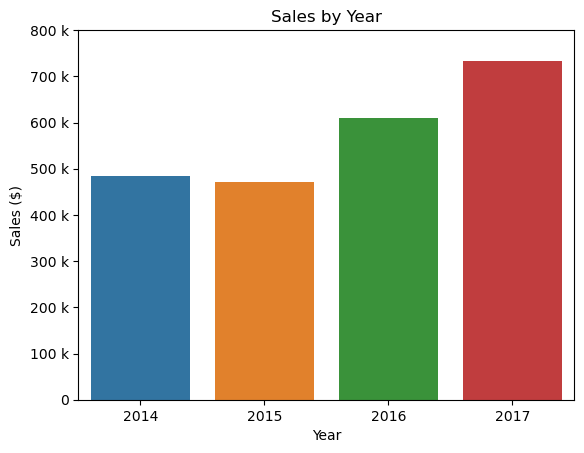

In [219]:
#Using Seaborn to plot create a barplot dispaying the sum of sales per year
plot_sales_by_year = sns.barplot(data=superstore_data, x='Year', y='Sales', errorbar = None, estimator=sum)

plt.title('Sales by Year')

#Formatting the y axis to have an appropriate scale and
plot_sales_by_year.set(ylim = (0,800000), ylabel = 'Sales ($)')
plot_sales_by_year.yaxis.set_major_formatter(ticker.EngFormatter())

We can see that sales stalled between 2014 and 2015, but showed good growth in the years after.

Let's look at the profit figures.

[Text(0, 0, '$49,543.97'),
 Text(0, 0, '$61,618.60'),
 Text(0, 0, '$81,795.17'),
 Text(0, 0, '$93,439.27')]

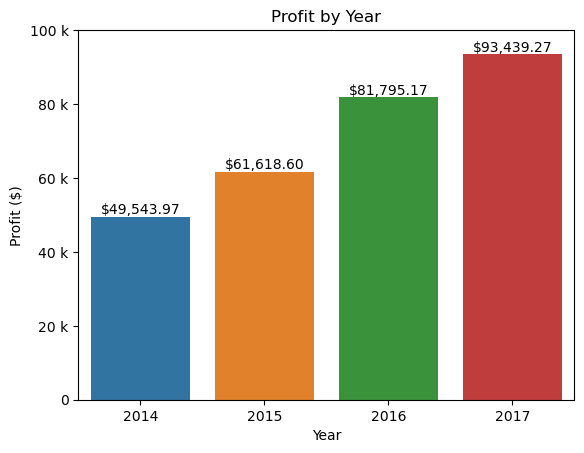

In [206]:
plot_profit_by_year = sns.barplot(data=superstore_data, x = 'Year', y ='Profit', errorbar = None, estimator=sum)

plt.title('Profit by Year')

plot_profit_by_year.set(ylim = (0,100000), ylabel = 'Profit ($)')
plot_profit_by_year.yaxis.set_major_formatter(ticker.EngFormatter())

#Adding in bar_labels that display the sum of profit for each year.
plot_profit_by_year.bar_label(plot_profit_by_year.containers[0], labels=[f'${x:,.2f}' for x in plot_profit_by_year.containers[0].datavalues])

We can see that even though sales stalled between 2014 and 2015, profit has increased year on year. It is good news that sales and profits have grown.

Let's look at what items made the most money over the span of the dataset.

In [106]:
def top_N_Products(N, Metric):  
    #Group the orders by product name.
    product_group = superstore_data.groupby('Product Name')
    
    #Take the sum of the preferred metric (Sales or Profit) for each product and return the N best products.
    best_selling = product_group[Metric].sum().nlargest(N)
    
    #Add currency formatting to the values 
    formatted_best_selling = best_selling.apply(lambda x: "${:,.2f}".format(x))
    
    return formatted_best_selling

The best items for sales were:

In [207]:
top_N_Products(3, 'Sales')

Product Name
Canon imageCLASS 2200 Advanced Copier                                          $61,599.82
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    $27,453.38
Cisco TelePresence System EX90 Videoconferencing Unit                          $22,638.48
Name: Sales, dtype: object

Were the best selling items also the most profitable? The products that made the most profit were:

In [209]:
top_N_Products(3, 'Profit')

Product Name
Canon imageCLASS 2200 Advanced Copier                                          $25,199.93
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     $7,753.04
Hewlett Packard LaserJet 3310 Copier                                            $6,983.88
Name: Profit, dtype: object

The Canon imageCLASS200 and Fellowes PB500 are both in the best selling and most profitable items, but the 3rd most sold item didn't return the 3rd most profit.

SALES BY MONTH

Comparing monthly sales over the years can help determine if there are trends throughout the year that can be capitalised on.

In [171]:
#Creating a column that parses the month of sales from the Order Date column
superstore_data['Month'] = superstore_data['Order Date Parsed'].dt.month

Text(0.5, 1.0, 'Comparing Monthly Sales by Year')

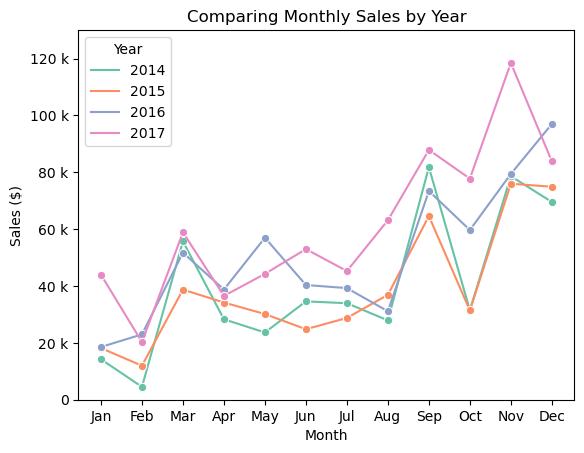

In [211]:
#Setting a colour palette for the lineplot 
colours = sns.color_palette('Set2',4)

monthly_comparison_plot = sns.lineplot(data=superstore_data, x='Month', y='Sales',
    hue='Year',  palette=colours, errorbar=None, marker = 'o', estimator=sum)

plt.title('Comparing Monthly Sales by Year')

monthly_comparison_plot.set(ylim = (0,130000), ylabel = 'Sales ($)')
monthly_comparison_plot.yaxis.set_major_formatter(ticker.EngFormatter())

# Creating a list of month names to pass into the graph as labels for the x-axis ticks
month_names = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

monthly_comparison_plot.set_xticks(range(1,13), labels = month_names)


We can see that there are increases in sales every March, September, November, and December.

SEGMENT ANALYSIS

The dataset specifies the type of customer each order was made by. The labels are Consumer, Corporate, and Home Office.

Breaking down sales by segment can give a better idea of which areas of the business are performing best and help decide where the superstore could focus marketing efforts.

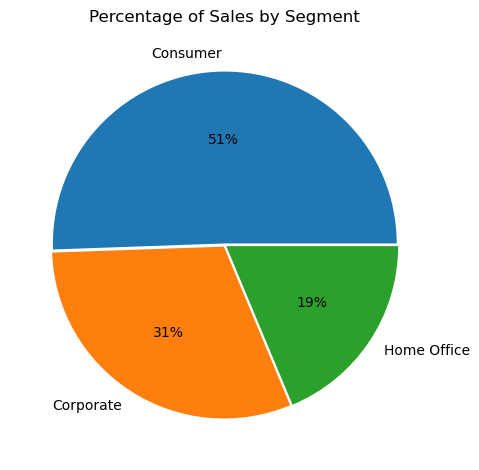

In [225]:
#Grouping the data by segment and finding the sum of sales for each segment
segment_sales_data = superstore_data.groupby(superstore_data['Segment'])['Sales'].sum()

#Using PyPlot to create a piechart for the data as pie charts are good for showing proportions.
plt.pie(segment_sales_data, labels = segment_sales_data.index, autopct='%.0f%%', explode = [0.01, 0.01 ,0.01])

plt.title('Percentage of Sales by Segment')
plt.tight_layout()

Consumer sales are the strongest segment by far. 

Let's have a look at how the segments have grown over time. This could indicate any weak areas for the business or areas that might benefit from increased investment.

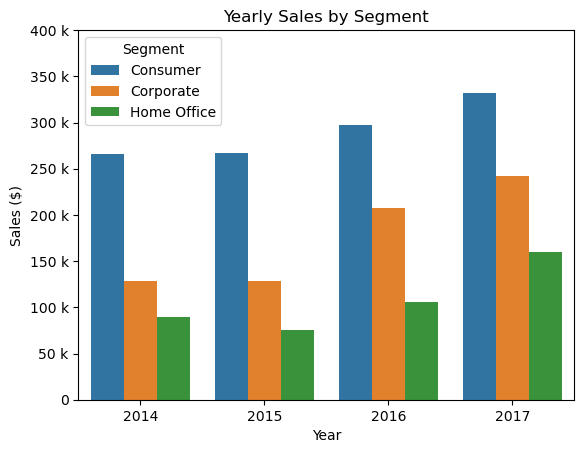

In [223]:
plot_yearly_sales_by_segment = sns.barplot(data=superstore_data, x='Year', y='Sales', 
                                      hue='Segment', errorbar=None, estimator=sum)

plt.title('Yearly Sales by Segment')

plot_yearly_sales_by_segment.set(ylim = (0,400000), ylabel = 'Sales ($)')
plot_yearly_sales_by_segment.yaxis.set_major_formatter(ticker.EngFormatter())

Corporate sales have seen significant growth over the years. It would be a good idea to cross-reference the sales information with the marketing spend to see whether it would be cost-efficient to try to keep driving corporate sales higher.

The best selling products by segment are:

In [108]:
def best_by_segment(N, Metric ):
    grouped_by_segment = superstore_data.groupby(['Segment', 'Product Name']).agg({Metric: sum})
    
    best_metric_by_segment = grouped_by_segment[Metric].groupby('Segment', group_keys=False).nlargest(N)
    
    formatted_best_metric_by_segment = best_metric_by_segment.apply(lambda x: "${:,.2f}".format(x))
    
    return (formatted_best_metric_by_segment)


In [180]:
best_by_segment(3, 'Sales')

Segment      Product Name                                             
Consumer     Canon imageCLASS 2200 Advanced Copier                        $32,899.91
             HP Designjet T520 Inkjet Large Format Printer - 24" Color    $18,374.90
             HON 5400 Series Task Chairs for Big and Tall                 $17,384.30
Corporate    Canon imageCLASS 2200 Advanced Copier                        $17,499.95
             3D Systems Cube Printer, 2nd Generation, Magenta             $14,299.89
             Martin Yale Chadless Opener Electric Letter Opener            $8,328.10
Home Office  Cisco TelePresence System EX90 Videoconferencing Unit        $22,638.48
             Canon imageCLASS 2200 Advanced Copier                        $11,199.97
             Hewlett Packard LaserJet 3310 Copier                          $9,239.85
Name: Sales, dtype: object

REGION ANALYSIS

Expanding a business can involve opening new locations, creating teargeted marketing campaigns, and seting up new distribution facilities. These activities require large amounts of investment and can pose many risks.

Understanding how different regions are performing can help the business decide which regions to allocate it's capital in order to maximise the returns and minimise risk.

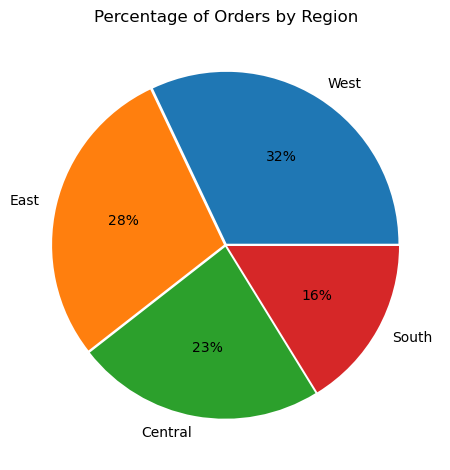

In [232]:
region_order_count = superstore_data['Region'].value_counts()
plt.pie(region_order_count, labels = region_order_count.index, autopct='%.0f%%', explode = [0.01, 0.01, 0.01, 0.01])

plt.title('Percentage of Orders by Region')
plt.tight_layout()

The stores in the East and West are the best performers overall, making almost 2/3 of all sales by the company.

Have they historically been the best sellers or has the data been skewed by any exceptionally good years?

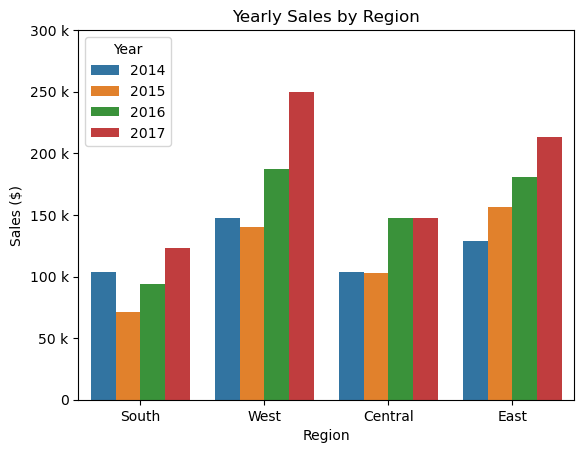

In [233]:
plot_sales_by_region = sns.barplot(data=superstore_data, x='Region', y='Sales',
             hue='Year', errorbar=None, estimator=sum)

plt.title('Yearly Sales by Region')
plot_sales_by_region.set(ylim = (0,300000), ylabel = 'Sales ($)')
plot_sales_by_region.yaxis.set_major_formatter(ticker.EngFormatter())

Stores in the West did have a very good year in 2017 but overall the two regions have always performed better than their counterparts. 
The East has seen seen year on year increases and looks promising for continued investment.

We can see that the South and Central regions started at roughly the same annual sales, but the Central region has been consistently better in years since. 

Let's look at whether the problems in the South are caused by different market needs or whether they may be caused by other factors.

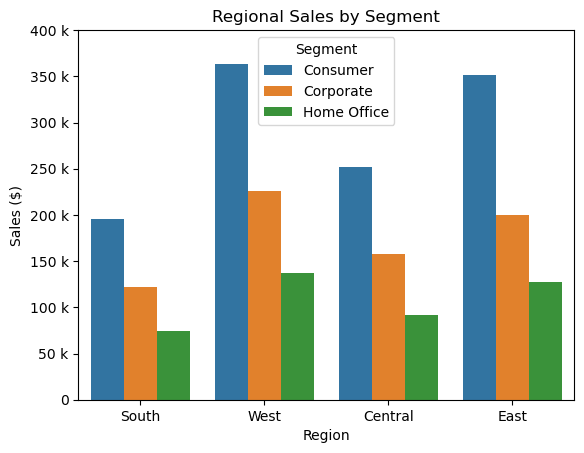

In [234]:
plot_region_sales_by_segment = sns.barplot(data=superstore_data, x='Region', y='Sales',
             hue='Segment', errorbar=None, estimator=sum)

plt.title('Regional Sales by Segment')

plot_region_sales_by_segment.set(ylim = (0,400000), ylabel = 'Sales ($)')
plot_region_sales_by_segment.yaxis.set_major_formatter(ticker.EngFormatter())

Sales by segment in the South are distributed similarly to those of other regions, suggesting that the problem isn't that the region has different market needs. 

The business may have stronger regional competition or lower brand presence in the South.

DISCOUNT ANALYSIS

Discounts are commonly used by businesses to entice new customers, reward customers who are making large orders, or to make amends for problems that a customer has experienced during their purchase. 

Let's have a look at how this business has used discounts.

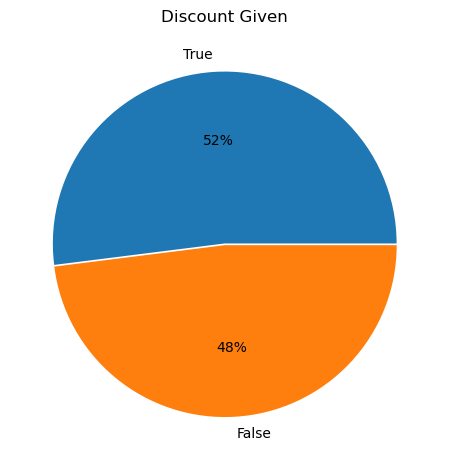

In [213]:
#Create a new columns that displays a bool value indicating whether a discount has been applied to the order.
superstore_data['Discount Applied'] = superstore_data['Discount']!=0

discount_order_count = superstore_data['Discount Applied'].value_counts()
plt.pie(discount_order_count, labels = discount_order_count.index, autopct='%.0f%%',explode= [0.01,0])

plt.title('Discount Given')
plt.tight_layout()

Over 50% of orders have had some sort of discount applied, that seems quite high. 

How much revenue has the business forfeited by giving discounts?

In [216]:
#Using condtional selection to only select orders that have a discount applied
discounted_sales = superstore_data[superstore_data['Discount Applied'] == True]

#Groups the orders by what percentage discount was given, then sums all sales in each group.
sales_by_discount_given = discounted_sales.groupby(['Discount']).Sales.sum()

discounted_revenue = 0

#Calculates the difference between the revenue with discount applied and how much revenue would have been made if no discount was applied.
for discount, value in sales_by_discount_given.items():
    discounted_revenue += (value/(1-discount))-value

print(f"Revenue lost through discounts given: ${discounted_revenue:,.2f}")

Revenue lost through discounts given: $566,734.18


That's equivalent to a year's worth of sales! This could be a problem if discounted sales aren't bringing in enough revenue.

Let's dig deeper into the discounts that have been given and who they've been given to.

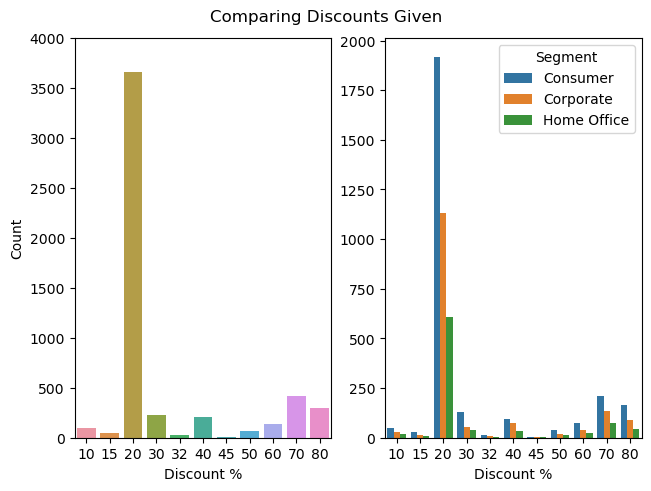

In [239]:
#Creates subplots so that 2 graphs can be displayed side by side. 
fig, ax =plt.subplots(1,2, sharex =True, constrained_layout = True)

#Converts the Discount column from a decimal amount to a percentage.
superstore_data['Discount %'] = (superstore_data['Discount'].apply(lambda x: int(x*100)))

#Plots the count of discount given on the first subplot.
plot_discount_order_count = sns.countplot(data = discounted_sales, x = 'Discount %',ax=ax[0])
plot_discount_order_count.set(ylim = (0,4000),ylabel = 'Count')

#Creates a list of segments so that I can set the hue order manually. This results in the hues appearing in size order(descending).
hue_order = ['Consumer', 'Corporate', 'Home Office']

plot_discount_by_segment = sns.countplot(data = discounted_sales, x = 'Discount %', hue = 'Segment', hue_order = hue_order, ax=ax[1])
plot_discount_by_segment.set(ylabel = None)

fig.suptitle('Comparing Discounts Given')

plt.show()

We can see that 20% was by far the most commonly given discount and that consumers were the largest users of discounts. 

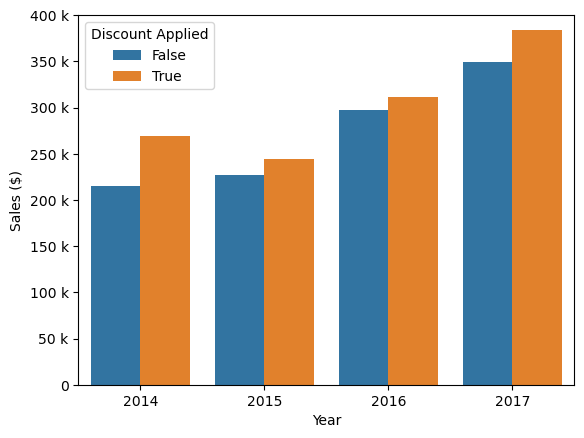

In [237]:
plot_total_discounts = sns.barplot(data = superstore_data, x = 'Year', y = 'Sales', hue = 'Discount Applied', errorbar = None, estimator = sum)

plot_total_discounts.set(ylim = (0,400000), ylabel = 'Sales ($)')
plot_total_discounts.yaxis.set_major_formatter(ticker.EngFormatter())

We can see that discounted sales actually made up the majority of revenue every year. Although the business is leaving a significant amount of money on the table by giving so many discounts, it is outweighed the fact that discounts have done an excellent job of drawing customers in.